## DA TEST

### Questions:
#### Question 1: What are the features/characteristics of AhaMove’s customers?
#### Question 2: Based on the insights you’ve learned so far about AhaMove (from provided data and your own knowledge), what suggestions you would give to AhaMove in order to make AhaMove’s business gets better in the next year.
####   

### Data preparation 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
orders = pd.read_csv('orders.csv')
users = pd.read_csv('users.csv')

In [3]:
orders.drop_duplicates(inplace=True)
users.drop_duplicates(inplace=True)

In [4]:
orders.created_at = pd.to_datetime(orders.created_at)
users.created_at = pd.to_datetime(users.created_at)

In [5]:
df = orders.merge(users,how = 'left',left_on= 'user_id',right_on= 'id',suffixes= ['_order', '_user']).drop('user_id',1)

In [6]:
print(len(df),len(orders))

1752328 1752328


In [7]:
df.head()

,id_order,created_at_order,service,city,status,stop_points,ship_distance,discount,cash_on_delivery,total_pay,id_user,created_at_user,category,salesman
0,206G6J5,2020-11-28,DG,Ha Noi,CANCELLED,NaN,20.43,15000,1800000,NaN,848980,2019-10-07,HOUSING & LIFESTYLE,phuongdtm
1,20EDQ9J,2020-11-28,DG,Ha Noi,CANCELLED,NaN,25.18,0,0,NaN,848103,2018-07-10,FOOD,Loan
2,20IMDC8,2020-11-28,DG,Ha Noi,CANCELLED,NaN,22.14,0,575000,NaN,747603,2019-05-04,FOOD,Đ Dũng
3,209N697,2020-11-28,DG,Ha Noi,COMPLETED,3.0,28.24,0,1090000,108000.0,893262,2018-06-13,GROCERY,NaN
4,200T5MW,2020-11-28,DG,Ha Noi,COMPLETED,3.0,23.36,10000,600000,75000.0,626752,2020-11-27,GROCERY,GiangLT


In [8]:
df.info(null_counts= True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1752328 entries, 0 to 1752327
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   id_order          1752328 non-null  object        
 1   created_at_order  1752328 non-null  datetime64[ns]
 2   service           1752328 non-null  object        
 3   city              1752328 non-null  object        
 4   status            1752328 non-null  object        
 5   stop_points       1517096 non-null  float64       
 6   ship_distance     1752328 non-null  float64       
 7   discount          1752328 non-null  int64         
 8   cash_on_delivery  1752328 non-null  int64         
 9   total_pay         1517096 non-null  float64       
 10  id_user           1752328 non-null  int64         
 11  created_at_user   1752328 non-null  datetime64[ns]
 12  category          1688888 non-null  object        
 13  salesman          1287546 non-null  object

### Data Exploration 

In [9]:
df.groupby(['city']).agg(Total_order = ('id_order','count'),
                         Total_customer = ('id_user', 'nunique'),
                         Total_pay = ('total_pay','sum'),
                         Avearage_pay = ('total_pay', 'mean'),
                         Total_discount = ('discount', 'sum'),
                         Average_discount = ('discount','mean')
                        )

,Total_order,Total_customer,Total_pay,Avearage_pay,Total_discount,Average_discount
city,,,,,,
Ha Noi,955454,74105,2.976040e+10,36333.667039,1475141922,1543.917260
Sai Gon,796874,67245,2.712354e+10,38858.387702,1385035298,1738.085692


#### Tổng quan 
+ 2 Khu vực khách hàng là Hà nội và Sài Gòn
+ Số lượng đơn đặt hàng, số lượng khách hàng và tổng số tiền thu được (doanh thu -Total pay) ở Hà nội là cao hơn
+ Tổng doanh thu ở Hà nội cao hơn. Tuy nhiên tổng số tiền bình quân khách hàng trả trên 1 đơn hàng ở Sài gòn cao hơn
+ Food, Individual needs, Grocery, Fashion and Heal & Beauty là Top 5 Category có số lượng đơn đặt hàng và số lượng KH cao nhất
+ Bike, Pool and Express là Top 3 services có số lượng đơn đặt hàng và số lượng KH cao nhất

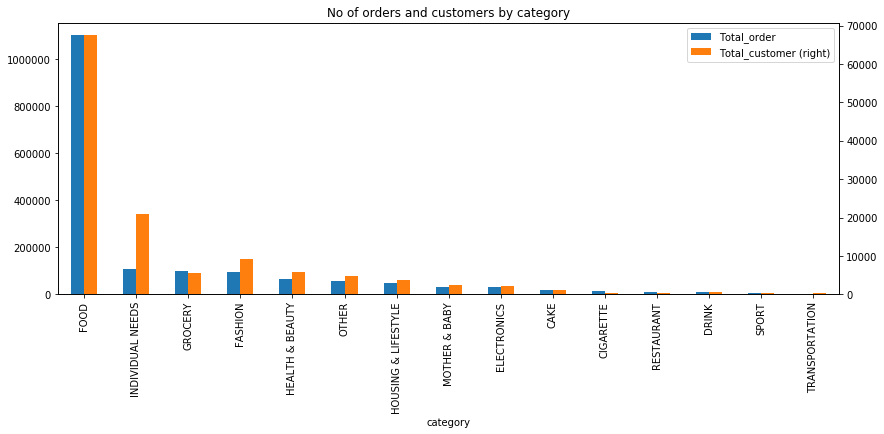

In [10]:
df.groupby(['category']).agg(Total_order = ('id_order','count'),
                         Total_customer = ('id_user', 'nunique')
                        ).sort_values('Total_order', ascending = False)\
                        .plot(kind = 'bar', y =['Total_order', 'Total_customer'],\
                              secondary_y = 'Total_customer',figsize = (14,5), title = 'No of orders and customers by category'                             
                        )


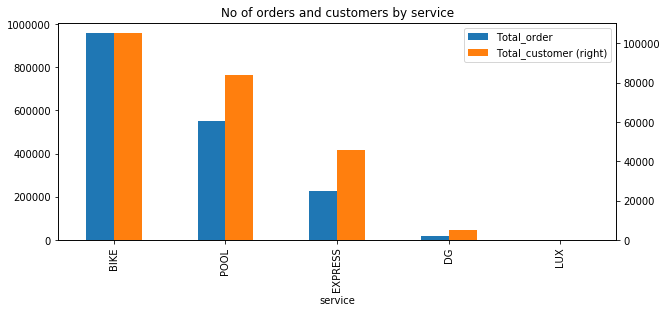

In [11]:
df.groupby(['service']).agg(Total_order = ('id_order','count'),
                         Total_customer = ('id_user', 'nunique')
                        ).sort_values('Total_order', ascending = False)\
                        .plot(kind = 'bar', y =['Total_order', 'Total_customer'],\
                              secondary_y = 'Total_customer',figsize = (10,4)
                              ,title = 'No of orders and customers by service'                             
                        )

#### Customer Analysis

In [12]:
df.groupby('status')['id_order'].count()

status
CANCELLED     235518
COMPLETED    1516810
Name: id_order, dtype: int64

##### Tổng hợp dữ liệu Khách hàng

In [13]:
# Chuẩn bị dữ liệu
com = df[df['status'] == 'COMPLETED'].copy()
can = df[df['status'] == 'CANCELLED'].copy()

# Khách hàng có đơn thành công
com_cus = com.groupby('id_user').agg(Total_order_com = ('id_order','count'),
                          Total_pay = ('total_pay','sum'),
                          Avearage_pay = ('total_pay', 'mean'),
                          Total_discount = ('discount', 'sum'),
                          Average_discount = ('discount','mean')
                          )

# Khách hàng có đơn bị hủy
can_cus = can.groupby('id_user')['id_order'].count().to_frame()

# All khách hàng có đơn đặt hàng
all_cus = df.groupby('id_user').agg(Total_order = ('id_order','count'),
                               First_order_date = ('created_at_order', 'min'),
                               Last_order_date = ('created_at_order', 'max')
                              )

# Merge và làm sạch dữ liệu
cus = all_cus.merge(com_cus, left_index = True, right_index = True, how = 'left')\
    .merge(can_cus, left_index = True, right_index = True, how = 'left')\
    .merge(users.set_index('id'), left_index = True, right_index = True, how = 'left')\

cus.rename(columns ={'id_order': 'Total_order_can', 'created_at': 'user_open_dt'},inplace = True)

cus = cus.iloc[:,[0,3,8,4,5,6,7,1,2,9,10,11]]

cus[['Total_order_com', 'Total_order_can']] = cus[['Total_order_com', 'Total_order_can']].fillna(0.0).applymap(lambda x : int(x))

In [14]:
cus.head()

,Total_order,Total_order_com,Total_order_can,Total_pay,Avearage_pay,Total_discount,Average_discount,First_order_date,Last_order_date,user_open_dt,category,salesman
id_user,,,,,,,,,,,,
10000,1,1,0,23000.0,23000.0,0.0,0.0,2020-11-27,2020-11-27,2020-09-26,NaN,NgocNB
10002,1,1,0,23000.0,23000.0,4000.0,4000.0,2020-04-11,2020-04-11,2019-01-15,FOOD,SGN_Hai
10003,1,1,0,32000.0,32000.0,0.0,0.0,2020-12-05,2020-12-05,2020-08-23,OTHER,SGN_PhuongVuong
10009,4,4,0,229000.0,57250.0,22000.0,5500.0,2020-04-04,2020-08-27,2020-03-11,FOOD,SGN_TamHa
10019,1,0,1,NaN,NaN,NaN,NaN,2020-01-22,2020-01-22,2019-08-24,NaN,NaN


In [15]:
cus.describe()

,Total_order,Total_order_com,Total_order_can,Total_pay,Avearage_pay,Total_discount,Average_discount
count,140324.000000,140324.000000,140324.000000,1.302580e+05,130258.000000,1.302580e+05,130258.000000
mean,12.487728,10.809341,1.678387,4.366097e+05,38868.229354,1.892990e+04,2220.901776
std,196.736686,175.497186,22.555431,4.704581e+06,18852.545943,6.599427e+04,3963.467804
min,1.000000,0.000000,0.000000,1.800000e+04,18000.000000,0.000000e+00,0.000000
25%,1.000000,1.000000,0.000000,4.700000e+04,27000.000000,0.000000e+00,0.000000
50%,3.000000,3.000000,0.000000,1.100000e+05,34000.000000,0.000000e+00,0.000000
75%,9.000000,8.000000,1.000000,3.220000e+05,45000.000000,1.500000e+04,3076.923077
max,66360.000000,60010.000000,6350.000000,1.240209e+09,461000.000000,7.981000e+06,105000.000000


#### Nhìn vào matrix trên có thể thấy :
+ Tổng số đơn hàng (Total_order): 50% số khách hàng không đặt nhiều hơn 3 đơn hàng, 75% số khách hàng không đặt nhiều hơn 9 đơn hàng, trong khi đó số đơn hàng trung bình 1 khách hàng đặt là ~ 12.5 đơn. Điều này do có 1 số lượng không lớn khách hàng đặt rất nhiều đơn hàng, cụ thể số đơn hàng nhiều nhất 1 khách hàng đặt là 66,360 đơn hàng --> Sự phân chia nhóm khách hàng dựa trên số lượng đơn hàng là rõ rệt (std ~ 196)
#####  
+ Tương tự đối với tổng số đơn hàng thành công, tổng số tiền phải trả của khách hàng cũng có sự phân tách rõ rệt
#####    

+ Nhìn vào số lượng đơn hàng bị hủy (Total_order_can), 75% số khách hàng không hủy nhiều hơn 1 đơn hàng, trong khi số đơn hàng trung bình 1 khách hàng hủy là ~ 1.7 đơn --> Lượng đơn hàng bị hủy đến nhiều từ 1 số lượng không lớn khách hàng. Số đơn hàng nhiều nhất mà 1 khách hàng hủy là 6,350 đơn, có thể thấy đây cũng là khách hàng có số đơn đặt hàng và số đơn đặt hàng thành công nhiều nhất
####  
+ Trung bình tiền trả trên 1 đơn hàng của 25% khách hàng không nhiều hơn 27,000. Con số đối với 50% và 75% số khách hàng là 34,000 và 45,000
####   
+ Histogram bên dưới mô tả phân bố lượng khách hàng dựa trên Tổng số đơn hàng, Tổng số tiền, Trung bình tiền trả trên 1 đơn hàng của các khách hàng mà có ít hơn 50 đơn hàng (phần lớn khách hàng)



                                 Phân bố lượng khách hàng dựa trên các tiêu chí                                 



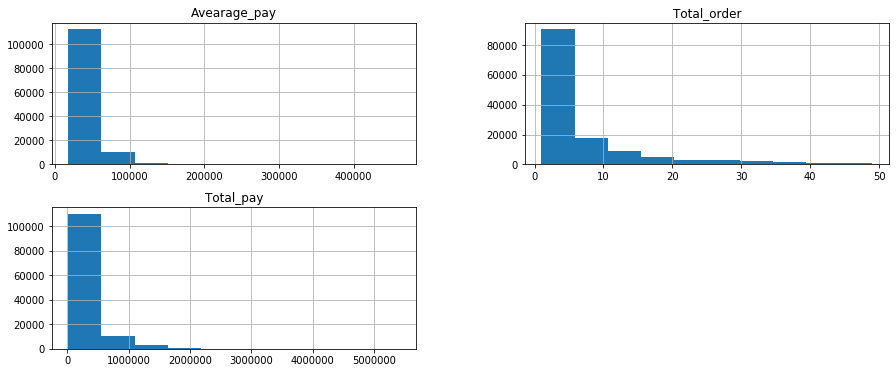

In [16]:
cus.loc[cus.Total_order < 50].hist(column= ['Total_order', 'Total_pay', 'Avearage_pay'], figsize = (15,6))
print()
print(('\033[1m' + 'Phân bố lượng khách hàng dựa trên các tiêu chí'+ '\033[0m').center(120))
print()

In [17]:
cus.corr()

,Total_order,Total_order_com,Total_order_can,Total_pay,Avearage_pay,Total_discount,Average_discount
Total_order,1.000000,0.999165,0.948152,0.932279,-0.003446,0.207869,-0.009401
Total_order_com,0.999165,1.000000,0.934378,0.924675,-0.004659,0.207678,-0.009603
Total_order_can,0.948152,0.934378,1.000000,0.937095,0.006197,0.197237,-0.007284
Total_pay,0.932279,0.924675,0.937095,1.000000,0.037097,0.245662,-0.012877
Avearage_pay,-0.003446,-0.004659,0.006197,0.037097,1.000000,-0.005001,0.076888
Total_discount,0.207869,0.207678,0.197237,0.245662,-0.005001,1.000000,0.184522
Average_discount,-0.009401,-0.009603,-0.007284,-0.012877,0.076888,0.184522,1.000000



+ Matrix thể hiên mức độ tương quan/liên quan [-1:1] của các trường dữ liệu với nhau
#####   

In [18]:
# Tạo thêm cột chia nhóm khách hàng dựa trên số đơn hàng mà khách hàng đặt
cus['frequent_cus'] = pd.qcut(cus.Total_order, q = 6, duplicates= 'drop',precision= 0)

In [19]:
# Tính tỷ lệ hủy đơn hàng, số lượng khách hàng, Tổng số tiền Total pay ở mỗi nhóm
tmp =cus.groupby('frequent_cus')[['Total_order','Total_order_can', 'Total_pay']].sum()
tmp['No_customer'] = cus.groupby('frequent_cus')['Total_order'].count()
tmp['can_percentage'] = (tmp.Total_order_can /tmp.Total_order) * 100

In [20]:
tmp.head()

,Total_order,Total_order_can,Total_pay,No_customer,can_percentage
frequent_cus,,,,,
"(0.0, 2.0]",82943,15694,2.725282e+09,63727,18.921428
"(2.0, 3.0]",35724,5892,1.149344e+09,11908,16.493114
"(3.0, 6.0]",95273,14919,3.038695e+09,19752,15.659211
"(6.0, 15.0]",219746,31739,6.946534e+09,21725,14.443494
"(15.0, 66360.0]",1318642,167274,4.301205e+10,23212,12.685323


####  
+ Tỷ lệ hủy đơn hàng cao, nhất là ở nhóm các KH có số lượng đơn đặt hàng ít nhất, (từ 1 đến 2 đơn)
+ Tỷ lệ hủy đơn hàng giảm dần ở các nhóm có số lượng đơn đặt hàng cao hơn

#### Tổng kết

##### Question 1: Customer's characteristics
+ 2 Khu vực khách hàng là Hà nội và Sài Gòn
+ Số lượng đơn đặt hàng, số lượng khách hàng và tổng số tiền thu được (doanh thu -Total pay) ở Hà nội là cao hơn
+ Tổng doanh thu ở Hà nội cao hơn. Tuy nhiên tổng số tiền bình quân khách hàng trả trên 1 đơn hàng ở Sài gòn cao hơn
+ Food, Individual needs, Grocery, Fashion and Heal & Beauty là Top 5 Category có số lượng đơn đặt hàng và số lượng KH cao nhất
+ Bike, Pool and Express là Top 3 services có số lượng đơn đặt hàng và số lượng KH cao nhất
+ Sự phân nhóm khách hàng dựa trên số lượng đơn hàng, tổng số tiền phải trả là rõ rệt. Phần lớn đơn hàng đến từ các khách hàng cá nhân đơn lẻ, giá trung tiền trung bình của 75% khách hàng trả trên 1 đơn hàng không nhiều hơn là 45,000 
+ Số lượng khách hàng hủy đơn hàng là không nhiều, 75% số khách hàng không hủy nhiều hơn 1 đơn hàng. Tuy nhiên số lượng đơn hàng bị hủy bởi lượng khách hàng còn lại là nhiều. Tỷ lệ hủy đơn hàng cao nhất đến từ nhóm khách hàng mà có ít đơn đặt hàng nhất và giảm dần ở các nhóm có số đơn đặt hàng cao hơn

##### Question 2: Suggestion:
+ Tỷ lệ hủy đơn hàng cao. Có thể cần có các biện pháp làm tăng tính ràng buộc với khách hàng để khách hàng giảm động cơ hủy đơn hàng: Như tăng khả năng nhận diện khách hàng bằng cách thu thập nhiều thông tin hơn hoặc đưa ra các hình thức phạt, xử lý như trừ điểm tích lũy, đánh giá...(để đổi thưởng, tham gia vào các chương hình khuyển mãi, discount) với các KH hủy đơn hàng,...

+ Ngoài ra thì, tỷ lệ hủy đơn hàng đến từ nhóm khách hàng có ít đơn đặt hàng nhất (từ 1 đến 2 đơn) và giảm dần ở các nhóm sau, đây có thể là nhóm khách hàng mới (có thể kiểm tra thêm bằng user_created_at) và là nhóm khách hàng có số lượng nhiều nhất: 63,727. Có thể đưa ra các chương trình khuyến mãi với 1, 2 đơn đầu tiên với khách hàng mới để giảm tỷ lệ hủy đơn của nhóm này
